# Final Project ー Analysis of Online News Popularity

This report is my final project for *Introduction to Machine Learning: Supervised Learning*.

The data I utilized in the project is "*Online News Popularity*" from UCI Machine Learning Repository https://archive.ics.uci.edu/. The reason I chose this dataset is that I am currently working as a journalist for a Japanese newspaper company, and I expected I might be able to gain some useful insights from the analysis.

## Objective
This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years.

The goal is to predict the the number of shares in social networks (popularity), which indicates whether articles "went viral". Although the target variables in this analysis are continuous, they were converted into binary data using a certain criterion to determine whether or not articles went viral on social networks, and then analyzed as a classification problem.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report

In [36]:
# Data
url = 'https://archive.ics.uci.edu/static/public/332/data.csv'
online_news_popularity = pd.read_csv(url)
news_df = pd.DataFrame(online_news_popularity)

## Attribute Information:
Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)<br>

     0. url:                           URL of the article (non-predictive)
     1. timedelta:                     Days between the article publication and the dataset acquisition (non-predictive)
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral tokens
    49. rate_negative_words:           Rate of negative words among non-neutral tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)

## Exploratory Data Analysis

In [37]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [38]:
# Split the data into X and y
X = news_df.drop(["url", " timedelta", " shares"], axis = 1)
y = news_df[" shares"]

In [39]:
X.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


In [40]:
# Target variables description
y.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

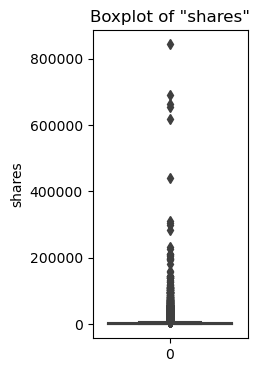

In [41]:
# Box plot of y
plt.figure(figsize=(2, 4))

sns.boxplot(data=y)
plt.title('Boxplot of "shares"')
plt.ylabel('shares')
plt.show()

## Data preparation

### Convert continuous variables y into binary data

Using the threshold of shares = 1400 which is the median of shares, I converted the data into binary data whether the news went viral(=1) or not(=0).

In [42]:
news_df['popular'] = news_df[' shares'].map(lambda x: 1 if x > 1400 else 0)
y = news_df['popular']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: popular, dtype: int64

### Standardize X

I plan to use Support Vector Machine model later, so I standardize the explanatory variables X in advance.

In [43]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 1 : Random Forest model

In [44]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
# Model
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [46]:
# Scores
rf_pred = rf.predict(X_test)

rf_report = classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      4055
           1       0.65      0.64      0.65      3874

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



## Dimentionarity Reduction

The dataset has a huge number of features, which may lead to overfitting and high cost of computation. Based on the result of Random Forest model, we can gain information about which features contribute the most to the model's predictions.

I selected 40 important features and reduced dimensionality by eliminating less important features to the extent that the model's performance was not lost.

In [47]:
# Importance of the features
important_features = rf.feature_importances_

# Column names
label = news_df.drop(["url", " timedelta", " shares"], axis = 1).columns

# Importance in descending order
indices = np.argsort(important_features)[::-1]

# Data Frame
importances_df = pd.DataFrame({'features': label[indices], 'importance': important_features[indices]})

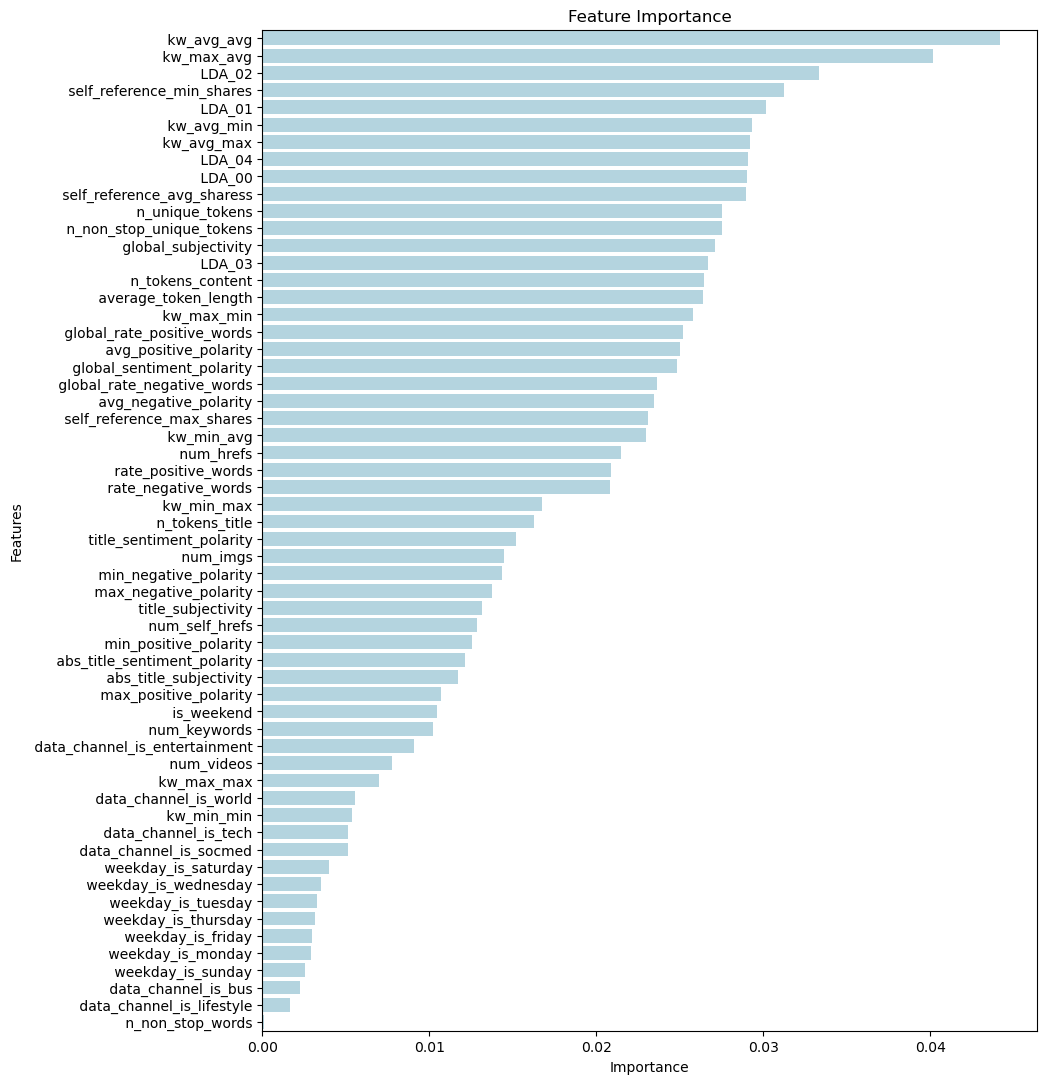

In [48]:
plt.figure(figsize=(10, 13))
sns.barplot(x='importance',
            y='features',
            data=importances_df,
            color='lightblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [49]:
important_features = importances_df.head(40).features.tolist()
important_features

[' kw_avg_avg',
 ' kw_max_avg',
 ' LDA_02',
 ' self_reference_min_shares',
 ' LDA_01',
 ' kw_avg_min',
 ' kw_avg_max',
 ' LDA_04',
 ' LDA_00',
 ' self_reference_avg_sharess',
 ' n_unique_tokens',
 ' n_non_stop_unique_tokens',
 ' global_subjectivity',
 ' LDA_03',
 ' n_tokens_content',
 ' average_token_length',
 ' kw_max_min',
 ' global_rate_positive_words',
 ' avg_positive_polarity',
 ' global_sentiment_polarity',
 ' global_rate_negative_words',
 ' avg_negative_polarity',
 ' self_reference_max_shares',
 ' kw_min_avg',
 ' num_hrefs',
 ' rate_positive_words',
 ' rate_negative_words',
 ' kw_min_max',
 ' n_tokens_title',
 ' title_sentiment_polarity',
 ' num_imgs',
 ' min_negative_polarity',
 ' max_negative_polarity',
 ' title_subjectivity',
 ' num_self_hrefs',
 ' min_positive_polarity',
 ' abs_title_sentiment_polarity',
 ' abs_title_subjectivity',
 ' max_positive_polarity',
 ' is_weekend']

In [50]:
# Optimization of the data
X_40features = news_df[important_features]

# Split the updated data
X_train, X_test, y_train, y_test = train_test_split(X_40features, y, test_size = 0.2, random_state = 0)

## Grid Search

In [51]:
# Grid Search
param_grid = {'n_estimators': [50, 100],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 10]}

rf_grid = GridSearchCV(rf,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    cv = 5)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 10],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [52]:
# Best parametors and score
print("Best Parameters:", rf_grid.best_params_)
print("Best Cross-Validation Score:", rf_grid.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.6568185401229701


In [53]:
# Best model
best_model = rf_grid.best_estimator_

# Score
rf_pred = best_model.predict(X_test)

rf_report = classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      4055
           1       0.64      0.65      0.65      3874

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



## 2 : AdaBoost model

In [54]:
# Model
adaboost = AdaBoostClassifier(DecisionTreeClassifier(), random_state = 0)

# Grid Search
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.1, 1, 10]}

adaboost_grid = GridSearchCV(adaboost,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    cv = 5)

adaboost_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                          random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [55]:
# Best parametors and score
print("Best Parameters:", adaboost_grid.best_params_)
print("Best Cross-Validation Score:", adaboost_grid.best_score_)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best Cross-Validation Score: 0.5713069525461139


In [56]:
# Best model
best_model = adaboost_grid.best_estimator_

# Score
adaboost_pred = best_model.predict(X_test)

adaboost_report = classification_report(y_test, adaboost_pred)
print(adaboost_report)

              precision    recall  f1-score   support

           0       0.58      0.57      0.57      4055
           1       0.56      0.56      0.56      3874

    accuracy                           0.57      7929
   macro avg       0.57      0.57      0.57      7929
weighted avg       0.57      0.57      0.57      7929



## 3 : Support Vector Machine model

In [57]:
# Model
svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)

# Score
svm_pred = svm.predict(X_test)

svm_report = classification_report(y_test, svm_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.57      0.68      0.62      4055
           1       0.58      0.47      0.52      3874

    accuracy                           0.57      7929
   macro avg       0.58      0.57      0.57      7929
weighted avg       0.58      0.57      0.57      7929



## Conclusions

On the analyzed data, Random Forest significantly outperformed AdaBoost and Support Vector Machine with a performance of 0.65 Accuracy and 0.65 Recall.

Random Forest combines predictions from many diverse trees, which help prevent overfitting. In contrast, AdaBoost is sensitive to noise and outliers, as it focuses on misclassified instances, which might lead to overfitting on these samples. Also, SVM can be sensitive to outliers, which can significantly affect the position of the decision boundary.

Looking at the box plot of "shares", there appear to be some outliers like 843300 and 663600. These samples may have lowered the performance of Adaboost and SVM.

|Method|Accuracy|Recall|
|:----|:--------|:----:|
|Random Forest| 0.65 | 0.65 |
|AdaBoost| 0.57 | 0.56 |
|SVM, RBF| 0.57 | 0.47 |

Based on the results of Random Forest model fitting, I was also able to extract some features that are important for predicting which articles would go viral on social networks.

Articles often reference other articles published in the same service. Analysis indicates that number of shares of all "Mashable" links cited in the article (known before publication) are likely to contribute to the shares on the social networks. Also, article keyword average shares (known before publication) are important features to predict articles' future popularity.
In other words, the preparation that goes into an article before publication will be extremely important for its popularity on social networks.

In contrast, features indicating when an article was published, e.g., Monday and Tuesday, do not seem to have impacts on the shares on the social networks.
What was surprising for me was that the number of images and videos did not have much effect on the target variable. The newspaper company I work for puts a lot of effort and resources into the visuals of its content, and we also have a dedicated social media team. The situation may be different in Japan, but the results of this analysis can still be helpful.

|Importance|Features|Description|
|:----|:--------|:----:|
|1| kw_avg_avg | Avg. keyword (avg. shares) |
|2| kw_max_avg | Avg. keyword (max. shares) |
|3| LDA_02 | Closeness to LDA topic 2 |
|4| self_reference_min_shares | Min. shares of referenced articles in Mashable |
|5| LDA_01 | Closeness to LDA topic 1 |
|6| kw_avg_min | Worst keyword (avg. shares) |
|7| kw_avg_max | Best keyword (avg. shares) |
|8| LDA_04 | Closeness to LDA topic 4 |
|9| LDA_00 | Closeness to LDA topic 0 |
|10| self_reference_avg_shares | Avg. shares of referenced articles in Mashable |